In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
import sqlite3

In [7]:
df=pd.read_csv(r"C:\Users\tirth\Downloads\Reviews.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [9]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

__Read data from sql__

In [10]:
con=sqlite3.connect(r"C:\Users\tirth\Downloads\database.sqlite")

In [11]:
type(con)

sqlite3.Connection

In [12]:
df=pd.read_sql_query('SELECT *FROM REVIEWS',con)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [14]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [15]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [16]:
df.HelpfulnessNumerator

0         1
1         0
2         1
3         3
4         0
         ..
568449    0
568450    0
568451    2
568452    1
568453    0
Name: HelpfulnessNumerator, Length: 568454, dtype: int64

In [17]:
df[(df['HelpfulnessNumerator'])>(df['HelpfulnessDenominator'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [18]:
df1=df[(df['HelpfulnessNumerator'])<=(df['HelpfulnessDenominator'])]

In [19]:
df1.shape

(568452, 10)

In [20]:
df.shape

(568454, 10)

In [21]:
df1.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [22]:
df1.loc[df1.duplicated(['UserId','ProfileName','Time','Text']),['UserId','ProfileName','Time','Text']]

,UserId,ProfileName,Time,Text
29,A3HDKO7OW0QNK4,Canadian Fan,1107820800,I don't know if it's the cactus or the tequila...
574,A3PJZ8TU8FDQ1K,Jared Castle,1231718400,"I'm addicted to salty and tangy flavors, so wh..."
1973,A2EPNS38TTLZYN,tedebear,1312675200,The pork chops from Omaha Steaks were very tas...
2309,AQM74O8Z4FMS0,Sunshine,1127606400,Too much of the white pith on this orange peel...
2323,AQM74O8Z4FMS0,Sunshine,1127606400,Too much of the white pith on this orange peel...
...,...,...,...,...
568409,A2PE0AGWV6OPL7,Dark Water Mermaid,1309651200,I was very pleased with the ingredient quality...
568410,A88HLWDCU57WG,R28,1332979200,My main reason for the five star review has to...
568411,AUX1HSY8FX55S,DAW,1319500800,I bought this to try on two registered Maine C...
568412,AVZ2OZ479Q9E8,Ai Ling Chow,1336435200,When we brought home two 3-month-old purebred ...


In [23]:
df1[df1.duplicated(['UserId','ProfileName','Time','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [24]:
data=df1.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])

In [25]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [26]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393931 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      393931 non-null  int64 
 1   ProductId               393931 non-null  object
 2   UserId                  393931 non-null  object
 3   ProfileName             393931 non-null  object
 4   HelpfulnessNumerator    393931 non-null  int64 
 5   HelpfulnessDenominator  393931 non-null  int64 
 6   Score                   393931 non-null  int64 
 7   Time                    393931 non-null  int64 
 8   Summary                 393931 non-null  object
 9   Text                    393931 non-null  object
dtypes: int64(5), object(5)
memory usage: 33.1+ MB


In [28]:
data['Time']=pd.to_datetime(data['Time'],unit='s')

C:\Users\tirth\AppData\Local\Temp\ipykernel_22496\796006669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time']=pd.to_datetime(data['Time'],unit='s')


In [29]:
data.Time

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

In [30]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

__Analyze what user amazone can recommend more product?__

In [31]:
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [32]:
target_cus=data.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by=['Summary','Text','Score','ProductId'],ascending=False)

In [33]:
# target_cus[0:10].plot(kind='bar')
target_cus

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
AZYMEMJL64MLD,1,1,1.000000,1
AZZ4NIC0S9LDL,1,1,1.000000,1
AZZLMJ88R9HPH,1,1,1.000000,1


<Axes: xlabel='UserId'>

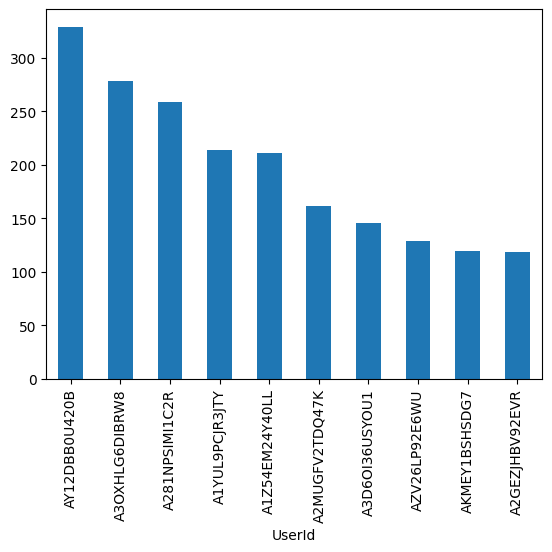

In [34]:
target_cus.ProductId[0:10].plot(kind='bar')

__Analyse which product have good reviews__

In [35]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [36]:
data.ProductId.unique()

array(['B001E4KFG0', 'B00813GRG4', 'B000LQOCH0', ..., 'B003S1WTCU',
       'B004I613EE', 'B001LR2CU2'], dtype=object)

In [37]:
data.loc[(data['Score']>4),['Score','ProductId']].sort_values(by='Score',ascending=False)

,Score,ProductId
0,5,B001E4KFG0
351617,5,B0035N287W
351619,5,B001EPPIPW
351620,5,B001EPPIPW
351622,5,B001EPPIPW
...,...,...
157405,5,B0019QT66I
157407,5,B0019QT66I
157408,5,B0019QT66I
157409,5,B0019QT66I


In [38]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [39]:
mp=df.ProductId.value_counts().reset_index()

In [40]:
mp

,ProductId,count
0,B007JFMH8M,913
1,B0026RQTGE,632
2,B002QWHJOU,632
3,B002QWP89S,632
4,B002QWP8H0,632
...,...,...
74253,B004DSPTTM,1
74254,B008C9QWU8,1
74255,B007O5A6BM,1
74256,B003Q4TZ08,1


In [41]:
mp=mp[mp['count']>500]

In [42]:
mp

,ProductId,count
0,B007JFMH8M,913
1,B0026RQTGE,632
2,B002QWHJOU,632
3,B002QWP89S,632
4,B002QWP8H0,632
5,B003B3OOPA,623
6,B001EO5Q64,567
7,B000VK8AVK,564
8,B0026KNQSA,564
9,B007M83302,564


In [43]:
mp.set_index(mp['ProductId'])

,ProductId,count
ProductId,,
B007JFMH8M,B007JFMH8M,913
B0026RQTGE,B0026RQTGE,632
B002QWHJOU,B002QWHJOU,632
B002QWP89S,B002QWP89S,632
B002QWP8H0,B002QWP8H0,632
B003B3OOPA,B003B3OOPA,623
B001EO5Q64,B001EO5Q64,567
B000VK8AVK,B000VK8AVK,564
B0026KNQSA,B0026KNQSA,564


In [44]:
x=mp.loc[:,'ProductId'].values

In [45]:
y=mp.loc[:,'count'].values

In [46]:
x

array(['B007JFMH8M', 'B0026RQTGE', 'B002QWHJOU', 'B002QWP89S',
       'B002QWP8H0', 'B003B3OOPA', 'B001EO5Q64', 'B000VK8AVK',
       'B0026KNQSA', 'B007M83302', 'B001RVFEP2', 'B001RVFERK',
       'B007M832YY', 'B0026KPDG8', 'B006HYLW32', 'B0013NUGDE',
       'B000KV7ZGQ', 'B000KV61FC', 'B0013A0QXC', 'B005K4Q37A',
       'B005K4Q4LK', 'B005K4Q34S', 'B005K4Q1YA', 'B000NMJWZO',
       'B000UBD88A', 'B0090X8IPM', 'B003GTR8IO', 'B007Y59HVM',
       'B005ZBZLT4'], dtype=object)

In [47]:
y

array([913, 632, 632, 632, 632, 623, 567, 564, 564, 564, 564, 564, 564,
       564, 564, 564, 556, 556, 542, 542, 542, 542, 542, 542, 542, 530,
       530, 506, 506], dtype=int64)

In [48]:
x=pd.DataFrame(x)

In [49]:
x.columns=['Prodid']

In [50]:
y=pd.DataFrame(y)

In [51]:
y.columns=['counts']

In [52]:
a=pd.concat([x,y],axis=1)

In [53]:
a.reset_index(drop=True, inplace=True) 

In [54]:
x=a.Prodid.values

In [55]:
x

array(['B007JFMH8M', 'B0026RQTGE', 'B002QWHJOU', 'B002QWP89S',
       'B002QWP8H0', 'B003B3OOPA', 'B001EO5Q64', 'B000VK8AVK',
       'B0026KNQSA', 'B007M83302', 'B001RVFEP2', 'B001RVFERK',
       'B007M832YY', 'B0026KPDG8', 'B006HYLW32', 'B0013NUGDE',
       'B000KV7ZGQ', 'B000KV61FC', 'B0013A0QXC', 'B005K4Q37A',
       'B005K4Q4LK', 'B005K4Q34S', 'B005K4Q1YA', 'B000NMJWZO',
       'B000UBD88A', 'B0090X8IPM', 'B003GTR8IO', 'B007Y59HVM',
       'B005ZBZLT4'], dtype=object)

In [56]:
frp=data[data['ProductId'].isin(x)]

In [57]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [58]:
frp.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [59]:
frp.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."


<Axes: xlabel='count', ylabel='ProductId'>

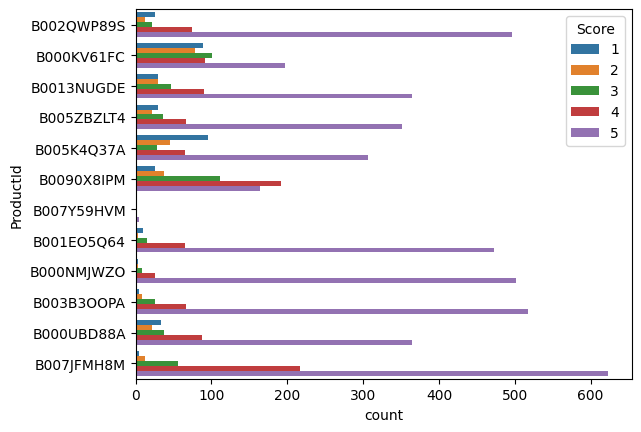

In [60]:
sns.countplot(y='ProductId',data=frp,hue='Score')

__Frequent Viewer__

In [61]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [62]:
x=data['UserId'].value_counts().sort_values()

In [63]:
x

UserId
A1QXFWZ4YB6RAJ      1
AYTSQHF8MK44T       1
ACNFCQKVIJC97       1
A1UF2ALNA3YHEW      1
ABWVHI16DMEP8       1
                 ... 
A1Z54EM24Y40LL    211
A1YUL9PCJR3JTY    214
A281NPSIMI1C2R    259
A3OXHLG6DIBRW8    278
AY12DBB0U420B     329
Name: count, Length: 256059, dtype: int64

In [64]:
data['f2']=data['UserId'].apply(lambda user:'Frequent' if x[user]>50 else 'Non frequent')

In [65]:
data['Freq']=data['UserId'].apply(lambda user:'Frequent' if x[user]>50 else 'Non frequent')

In [66]:
data[data['UserId']=='AY12DBB0U420B']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,f2,Freq
109,110,B001REEG6C,AY12DBB0U420B,Gary Peterson,0,0,5,2011-09-19,My Idea of a Good Diet Food.,I'm presently on a diet and I was at my Fresh ...,Frequent,Frequent
2196,2197,B008YAXFWI,AY12DBB0U420B,Gary Peterson,0,0,4,2012-09-03,"Mild Taste, But Delicious.",A nearby Fresh and Easy Neighborhood Market st...,Frequent,Frequent
3016,3017,B0025UALB6,AY12DBB0U420B,Gary Peterson,0,0,4,2011-09-23,Good Nutrition and Right Size.,"When I'm working, I always carry my own lunch....",Frequent,Frequent
3528,3529,B005TY2REE,AY12DBB0U420B,Gary Peterson,0,0,4,2012-04-07,No cholesterol. No Sodium. Not Very Sweet. Goo...,In my trip through the health area of my local...,Frequent,Frequent
3826,3827,B000X2CWTM,AY12DBB0U420B,Gary Peterson,1,1,5,2010-01-13,Mmmmmmmm!,I've always liked licorice candy and the best ...,Frequent,Frequent
...,...,...,...,...,...,...,...,...,...,...,...,...
561876,561877,B003SBU4B8,AY12DBB0U420B,Gary Peterson,0,0,5,2012-08-13,"Somewhat Sweet, But Not Too Much. These Work W...","Not too long ago, I bought a packet of Hansen'...",Frequent,Frequent
562501,562502,B006ZH0Z98,AY12DBB0U420B,Gary Peterson,0,0,5,2012-04-02,Dieters Beware! These Are Awesome!,I shop for groceries at a nearby Fresh and Eas...,Frequent,Frequent
563955,563956,B001XSMANI,AY12DBB0U420B,Gary Peterson,3,3,5,2010-03-25,Much Too Tasty!,I've always liked jelly beans and my wife has ...,Frequent,Frequent
564135,564136,B003OBQT7U,AY12DBB0U420B,Gary Peterson,0,0,5,2012-03-16,"Refreshing Minty Aftertaste, Quite Good, Very ...",I enjoy trying new things and my nearby Fresh ...,Frequent,Frequent


In [67]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,f2,Freq
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Non frequent,Non frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Non frequent,Non frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Non frequent,Non frequent


In [68]:
fr=(data[data.Freq =='Frequent'])

In [69]:
nfr=data[data.Freq =='Non frequent']

In [70]:
fr.Score.value_counts()/len(fr)*100

Score
5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: count, dtype: float64

In [71]:
nfr.Score.value_counts()/len(nfr)*100

Score
5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: count, dtype: float64

__Frequent user more verbose__

In [72]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'f2',
       'Freq'],
      dtype='object')

In [73]:
data.Text

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [74]:
data[['UserId', 'ProductId','Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [75]:
data[data.Text.notna()]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,f2,Freq
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Non frequent,Non frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Non frequent,Non frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Non frequent,Non frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Non frequent,Non frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Non frequent,Non frequent
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Non frequent,Non frequent
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Non frequent,Non frequent
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Non frequent,Non frequent
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Non frequent,Non frequent


In [76]:
import chart_studio.plotly as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [77]:
data.Text

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [78]:
text=data['Text'].dropna()

In [79]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
from textblob import TextBlob

In [92]:
data['Summary'][1]

'Not as Advertised'

In [91]:
TextBlob(data['Summary'][1]).sentiment.polarity

0.0

In [85]:
s=data[0:50000]

In [89]:
pol=[]
for i in s['Summary']:
    if i!='':
        pol.append(TextBlob(i).sentiment.polarity)


In [93]:
s['Polarity']=pol

In [94]:
s.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,f2,Freq,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Non frequent,Non frequent,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Non frequent,Non frequent,0.0


In [95]:
s.Polarity.value_counts()

Polarity
 0.000000    16186
 1.000000     6976
 0.500000     3228
 0.800000     3156
 0.700000     2237
             ...  
-0.195312        1
 0.115000        1
 0.572035        1
 0.376667        1
-0.336538        1
Name: count, Length: 1540, dtype: int64

In [99]:
np=s[s['Polarity']<0]
pp=s[s['Polarity']>0]

In [102]:
from collections import Counter

In [104]:
Counter(np.Summary).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [105]:
Counter(pp.Summary).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]

In [106]:
np.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,f2,Freq,Polarity,np,pp
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,2012-09-20,poor taste,I love eating them and they are good for watch...,Non frequent,Non frequent,-0.4,True,False
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,2012-03-25,Nasty No flavor,"The candy is just red , No flavor . Just plan...",Non frequent,Non frequent,-1.0,True,False


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393931 entries, 0 to 568453
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      393931 non-null  int64         
 1   ProductId               393931 non-null  object        
 2   UserId                  393931 non-null  object        
 3   ProfileName             393931 non-null  object        
 4   HelpfulnessNumerator    393931 non-null  int64         
 5   HelpfulnessDenominator  393931 non-null  int64         
 6   Score                   393931 non-null  int64         
 7   Time                    393931 non-null  datetime64[ns]
 8   Summary                 393931 non-null  object        
 9   Text                    393931 non-null  object        
 10  f2                      393931 non-null  object        
 11  Freq                    393931 non-null  object        
dtypes: datetime64[ns](1), int64(4), obj

In [108]:
393931-44691

349240

In [114]:
txt=data.Text.dropna()[0:50000]

In [115]:
txt

0        I have bought several of the Vitality canned d...
1        Product arrived labeled as Jumbo Salted Peanut...
2        This is a confection that has been around a fe...
3        If you are looking for the secret ingredient i...
4        Great taffy at a great price.  There was a wid...
                               ...                        
54249    This is my 2nd favorite Nescafe drink after th...
54250    This flavor is by far the best of the 5 flavor...
54251    If you enjoy making cappuccino's with your Dol...
54252    the cappuccino is very good, but because there...
54253    This cappuccino mix is the best, most coffee s...
Name: Text, Length: 50000, dtype: object

In [116]:
txt='  '.join(txt)

In [113]:
from wordcloud import WordCloud

In [117]:
title_c=WordCloud(background_color='white',height=2000,width=4000,max_words=200).generate(txt)
title_c

In [119]:
import matplotlib.pyplot as plt

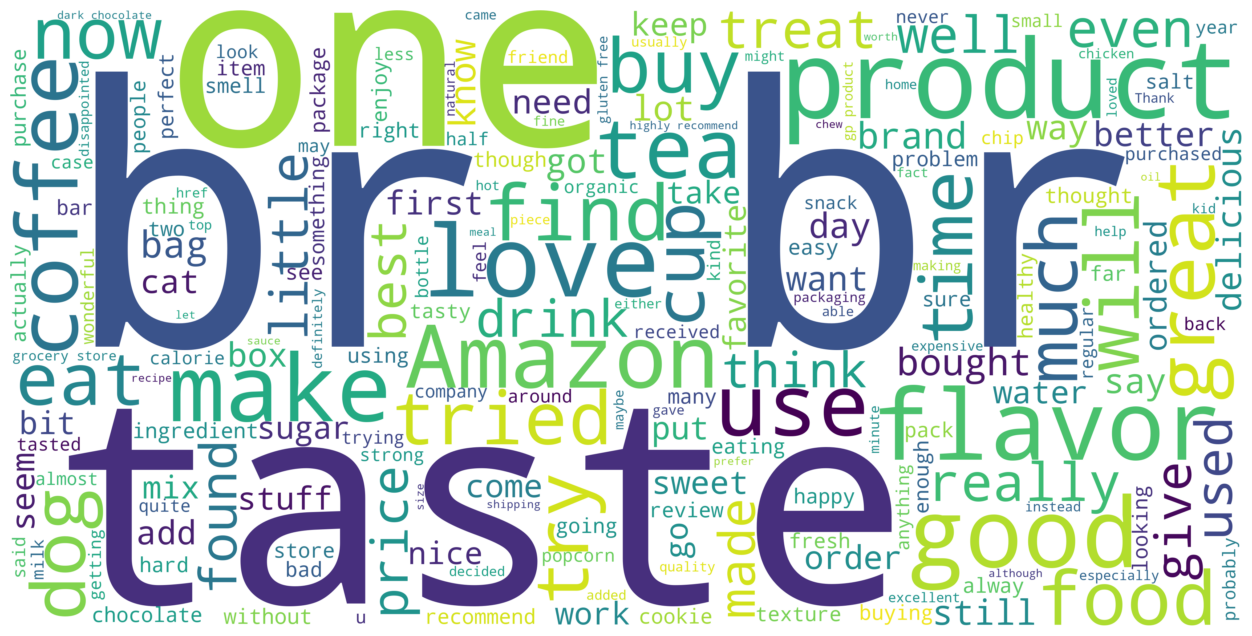

In [120]:
plt.figure(figsize=(16,8))
plt.imshow(title_c,interpolation='bilinear')
plt.axis('off')
plt.show()